In [1]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.3 MB/s eta 0:00:00


In [2]:
# import Python packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# import dataset
queens = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_queens.xlsx")
brooklyn = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_brooklyn.xlsx")
manhattan = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_manhattan.xlsx")
bronx = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_bronx.xlsx")
statenisland = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_statenisland.xlsx")

all_data = pd.concat([queens, brooklyn, manhattan, bronx, statenisland])

# data cleaning for all_data
all_data.info()
all_data.describe()

# According to all_data.info(), the following columns have NaN:
# Land square feet
# Gross square feet
# Year built
# Zip Code

# According to all_data.describe(), the following columns have values equal to 0 which they should not have:
# Land square feet
# Gross square feet
# Year built
# Sale price

# drop rows with NaN
all_data.dropna(subset = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE'], inplace = True)

# drop unreasonable data
# drop rows with LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, or SALE PRICE equals to 0
all_data = all_data.loc[~((all_data['LAND SQUARE FEET'] == 0) | (all_data['GROSS SQUARE FEET'] == 0) | (all_data['YEAR BUILT'] == 0) | (all_data['SALE PRICE'] == 0))]


# split all_data into training and testing datasets for linear regression
training_data, testing_data = train_test_split(all_data, test_size = 0.2, random_state = 25)

/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_queens.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_statenisland.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_bronx.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_brooklyn.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_manhattan.xlsx
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98270 entries, 0 to 9087
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         98270 non-null  int64         
 1   NEIGHBORHOOD                    98270 non-null  object        
 2   BUILDING CLASS CATEGORY         98270 non-null  object        
 3   TAX CLASS AT PRESENT            98210 non-null  object        
 4   BLOCK                           98270 non-null  int64      

In [3]:
# Step 1: understand the dataset

# shape of the training dataset and teh testing dataset
training_data #450988 rows × 10 columns
testing_data #112748 rows × 10 columns

# understand the nature of teh training data
training_data.info()
training_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24780 entries, 11585 to 7251
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         24780 non-null  int64         
 1   NEIGHBORHOOD                    24780 non-null  object        
 2   BUILDING CLASS CATEGORY         24780 non-null  object        
 3   TAX CLASS AT PRESENT            24780 non-null  object        
 4   BLOCK                           24780 non-null  int64         
 5   LOT                             24780 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       24780 non-null  object        
 8   ADDRESS                         24780 non-null  object        
 9   APARTMENT NUMBER                122 non-null    object        
 10  ZIP CODE                        24780 non-null  float64       
 11 

,BOROUGH,BLOCK,LOT,EASEMENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,24780.000000,24780.000000,24780.000000,0.0,24780.000000,24780.000000,24780.000000,24780.000000,2.478000e+04,2.478000e+04,24780.000000,24780.000000,2.478000e+04
mean,3.530993,5379.537893,68.711824,NaN,10985.990839,4.996045,0.429822,5.425868,6.793251e+03,7.617792e+03,1942.170299,1.257587,2.300329e+06
std,1.036273,3683.621649,164.618421,NaN,479.190488,33.001095,15.424027,36.422724,1.215309e+05,5.576344e+04,31.259744,0.724342,1.583059e+07
min,1.000000,3.000000,1.000000,NaN,10001.000000,0.000000,0.000000,0.000000,1.100000e+02,5.200000e+01,1800.000000,1.000000,1.000000e+00
25%,3.000000,2438.000000,19.000000,NaN,10461.000000,1.000000,0.000000,1.000000,2.000000e+03,1.400000e+03,1920.000000,1.000000,6.242872e+05
50%,4.000000,4923.500000,39.000000,NaN,11220.000000,1.000000,0.000000,2.000000,2.500000e+03,1.944000e+03,1931.000000,1.000000,8.500000e+05
75%,4.000000,7565.000000,64.000000,NaN,11368.000000,2.000000,0.000000,2.000000,4.000000e+03,2.856250e+03,1960.000000,1.000000,1.289250e+06
max,5.000000,16322.000000,9055.000000,NaN,11694.000000,761.000000,2261.000000,2261.000000,5.799632e+06,2.400000e+06,2021.000000,4.000000,9.310000e+08


In [4]:
# The following variables may need feature engineering:
# NEIGHBORHOOD
# BUILDING CLASS CATEGORY
# ADDRESS
# ZIP CODE

training_data.describe().columns
df_num = training_data[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']]
df_cat = training_data[['BOROUGH', 'ZIP CODE']]

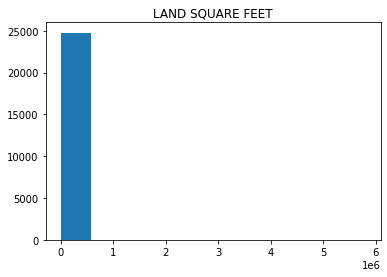

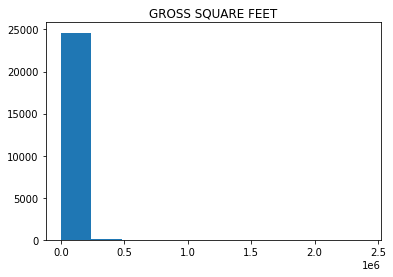

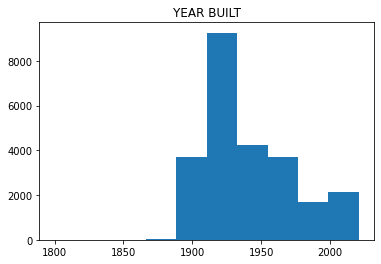

In [5]:
# plot the distribution of the numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [6]:
# data cleansing for three numerical variables
# drop rows where LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT or SALE PRICE is 0
training_data_drop_0 = training_data.loc[~((training_data['LAND SQUARE FEET'] == 0) | (training_data['GROSS SQUARE FEET'] == 0) | (training_data['YEAR BUILT'] == 0) | (training_data['SALE PRICE'] == 0))]
training_data_drop_0.describe()

# NEXT STEP: research about the smallest habitable space; drop outliers
# identifying values that are outside of the outter fence(Q3 + 3*IQ) to be outliers
# outter_fence_land = 2800 + 3*()
# lower_fence_price = 340000 - 1.5 * (730000 - 340000)

# after researching about the smallest habitable space and the smallest apartment in NYC
# I decided to drop rows with LAND SQUARE FEET < 60 or GROSS SQUARE FEET < 60
# in addition, since this dataset includes data from 2003 to 2019, I looked up the 
training_data_clean = training_data_drop_0.loc[(training_data_drop_0['LAND SQUARE FEET'] >= 60) & (training_data_drop_0['GROSS SQUARE FEET'] >= 60)]
training_data_clean.describe()

training_data_clean.sort_values('SALE PRICE').head(20000)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
15371,4,JACKSON HEIGHTS,01 ONE FAMILY DWELLINGS,1,1405,1,NaN,A5,31-09 93RD STREET,NaN,...,1.0,0.0,1.0,2000.0,1284.0,1930.0,1,A5,1,2021-08-06
18239,3,GREENPOINT,02 TWO FAMILY DWELLINGS,1,2619,49,NaN,B2,1016 LORIMER STREET,NaN,...,2.0,0.0,2.0,1667.0,1626.0,1899.0,1,B2,1,2021-11-23
19685,3,MANHATTAN BEACH,01 ONE FAMILY DWELLINGS,1,8756,35,NaN,A2,1515 ORIENTAL BOULEVARD,NaN,...,1.0,0.0,1.0,2500.0,2280.0,1925.0,1,A2,1,2022-03-21
5875,4,ELMHURST,02 TWO FAMILY DWELLINGS,1,2864,28,NaN,B1,8624 GRAND AVENUE,NaN,...,2.0,0.0,2.0,3703.0,2468.0,1945.0,1,B1,1,2022-01-17
5375,5,NEW SPRINGVILLE,02 TWO FAMILY DWELLINGS,1,2397,12,NaN,B2,19 BRUNSWICK,NaN,...,2.0,0.0,2.0,4100.0,2600.0,1970.0,1,B2,1,2021-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24335,3,PROSPECT HEIGHTS,01 ONE FAMILY DWELLINGS,1,1146,21,NaN,A9,736 BERGEN STREET,NaN,...,1.0,0.0,1.0,1173.0,1318.0,1920.0,1,A9,1500000,2021-06-11
4853,3,BOROUGH PARK,02 TWO FAMILY DWELLINGS,1,5696,62,NaN,B2,1137 58TH STREET,NaN,...,2.0,0.0,2.0,2003.0,1808.0,1925.0,1,B2,1500000,2021-12-29
17823,3,GRAVESEND,03 THREE FAMILY DWELLINGS,1,6882,18,NaN,C0,8747 26TH AVENUE,NaN,...,3.0,0.0,3.0,2248.0,2280.0,1935.0,1,C0,1500000,2021-12-01
20017,4,MIDDLE VILLAGE,02 TWO FAMILY DWELLINGS,1,3056,60,NaN,B3,72-26 66TH RD,NaN,...,2.0,0.0,2.0,3500.0,3750.0,1955.0,1,B3,1500000,2021-08-30
